#Import Packages


In [274]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt #visualization
import seaborn as sns #visualization
import sklearn
import datetime
from sklearn import preprocessing #scaling
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.model_selection import cross_val_score #parameter tuning
from sklearn.model_selection import RepeatedKFold #parameter tuning
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
import category_encoders as ce
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.metrics import classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Lasso
from sklearn.metrics import  r2_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


#Reading Data

In [90]:
df=pd.read_csv("/content/drive/MyDrive/ML_BH/fraud_oracle.csv")
df.drop(['PolicyNumber','RepNumber'],inplace=True,axis=1)
df.info()
df.drop_duplicates()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15420 entries, 0 to 15419
Data columns (total 31 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Month                 15420 non-null  object
 1   WeekOfMonth           15420 non-null  int64 
 2   DayOfWeek             15420 non-null  object
 3   Make                  15420 non-null  object
 4   AccidentArea          15420 non-null  object
 5   DayOfWeekClaimed      15420 non-null  object
 6   MonthClaimed          15420 non-null  object
 7   WeekOfMonthClaimed    15420 non-null  int64 
 8   Sex                   15420 non-null  object
 9   MaritalStatus         15420 non-null  object
 10  Age                   15420 non-null  int64 
 11  Fault                 15420 non-null  object
 12  PolicyType            15420 non-null  object
 13  VehicleCategory       15420 non-null  object
 14  VehiclePrice          15420 non-null  object
 15  FraudFound_P          15420 non-null

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15415,Nov,4,Friday,Toyota,Urban,Tuesday,Nov,5,Male,Married,...,6 years,31 to 35,No,No,External,none,no change,1 vehicle,1996,Collision
15416,Nov,5,Thursday,Pontiac,Urban,Friday,Dec,1,Male,Married,...,6 years,31 to 35,No,No,External,more than 5,no change,3 to 4,1996,Liability
15417,Nov,5,Thursday,Toyota,Rural,Friday,Dec,1,Male,Single,...,5 years,26 to 30,No,No,External,1 to 2,no change,1 vehicle,1996,Collision
15418,Dec,1,Monday,Toyota,Urban,Thursday,Dec,2,Female,Married,...,2 years,31 to 35,No,No,External,more than 5,no change,1 vehicle,1996,All Perils


#Check for Classes

In [80]:
df.FraudFound_P.unique()

array([0, 1])

non-fraud:  14497
fraud:  923
total:  15420


[Text(0.5, 1.0, 'No Fraud vs Fraud')]

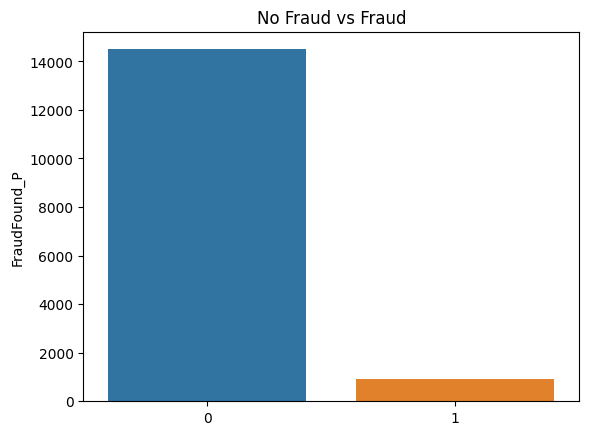

In [81]:
fraud = df[df.FraudFound_P==1]
nofraud = df[df.FraudFound_P==0]
print('non-fraud: ',len(nofraud))
print('fraud: ',len(fraud))
print('total: ',len(fraud)+len(nofraud))
sns.barplot(x=df['FraudFound_P'].value_counts().index,y=df['FraudFound_P'].value_counts()).set(title='No Fraud vs Fraud')

#Data Exploration

In [82]:
df.columns

Index(['Month', 'WeekOfMonth', 'DayOfWeek', 'Make', 'AccidentArea',
       'DayOfWeekClaimed', 'MonthClaimed', 'WeekOfMonthClaimed', 'Sex',
       'MaritalStatus', 'Age', 'Fault', 'PolicyType', 'VehicleCategory',
       'VehiclePrice', 'FraudFound_P', 'Deductible', 'DriverRating',
       'Days_Policy_Accident', 'Days_Policy_Claim', 'PastNumberOfClaims',
       'AgeOfVehicle', 'AgeOfPolicyHolder', 'PoliceReportFiled',
       'WitnessPresent', 'AgentType', 'NumberOfSuppliments',
       'AddressChange_Claim', 'NumberOfCars', 'Year', 'BasePolicy'],
      dtype='object')

In [91]:
def Target_Encoder(df,var,target):
  encoder = ce.TargetEncoder(cols=[var])
  encoder.fit(df[var], df[target])
  encoded_month = encoder.transform(df[var])
  df[var] = encoded_month
  return df


In [92]:
#Month
df=Target_Encoder(df,'Month','FraudFound_P')
df['Month']

0        0.048249
1        0.061658
2        0.053640
3        0.060560
4        0.061658
           ...   
15415    0.038301
15416    0.038301
15417    0.038301
15418    0.048249
15419    0.048249
Name: Month, Length: 15420, dtype: float64

In [93]:
#WeekOfMonth
df=Target_Encoder(df,'WeekOfMonth','FraudFound_P')
df['WeekOfMonth']

0        0.055589
1        0.059066
2        0.055589
3        0.063238
4        0.055589
           ...   
15415    0.056504
15416    0.055589
15417    0.055589
15418    0.062755
15419    0.063238
Name: WeekOfMonth, Length: 15420, dtype: float64

In [94]:
#DayOfWeek
df=Target_Encoder(df,'DayOfWeek','FraudFound_P')
df['DayOfWeek']

0        0.053265
1        0.053265
2        0.062986
3        0.066599
4        0.061162
           ...   
15415    0.062986
15416    0.055223
15417    0.055223
15418    0.061162
15419    0.053265
Name: DayOfWeek, Length: 15420, dtype: float64

In [95]:
#Make
df['Make'].value_counts()
values_to_exclude=['Jaguar','Porche','Mecedes','Ferrari','Lexus']
df = df[~df['Make'].isin(values_to_exclude)]
df=Target_Encoder(df,'Make','FraudFound_P')
df['Make']

<ipython-input-91-79e7ef8a147f>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[var] = encoded_month


0        0.063906
1        0.063906
2        0.063906
3        0.059596
4        0.063906
           ...   
15415    0.059596
15416    0.055512
15417    0.059596
15418    0.059596
15419    0.059596
Name: Make, Length: 15402, dtype: float64

In [101]:
#AccidentArea
df['AccidentArea'].value_counts()
df = pd.get_dummies(df, columns=['AccidentArea'])
df=df.drop(columns=['AccidentArea_Rural'])

In [104]:
#DayOfWeekClaimed
df=Target_Encoder(df,'DayOfWeekClaimed','FraudFound_P')
df['DayOfWeekClaimed']

0        0.058719
1        0.057303
2        0.054176
3        0.065731
4        0.058719
           ...   
15415    0.058719
15416    0.065731
15417    0.065731
15418    0.054176
15419    0.054176
Name: DayOfWeekClaimed, Length: 15402, dtype: float64

In [107]:
#MonthClaimed
df=Target_Encoder(df,'MonthClaimed','FraudFound_P')
df['MonthClaimed']

0        0.063756
1        0.063756
2        0.035853
3        0.045752
4        0.060653
           ...   
15415    0.035853
15416    0.042795
15417    0.042795
15418    0.042795
15419    0.042795
Name: MonthClaimed, Length: 15402, dtype: float64

In [109]:
#WeekOfMonthClaimed
df=Target_Encoder(df,'WeekOfMonthClaimed','FraudFound_P')
df['WeekOfMonthClaimed']

0        0.063805
1        0.060951
2        0.055735
3        0.063805
4        0.055735
           ...   
15415    0.052674
15416    0.063805
15417    0.063805
15418    0.055735
15419    0.061784
Name: WeekOfMonthClaimed, Length: 15402, dtype: float64

In [112]:
#Sex
sex_mapping = {'Male': 1, 'Female': 0}
df['Sex'] = df['Sex'].map(sex_mapping)
df['Sex']

0        0
1        1
2        1
3        1
4        0
        ..
15415    1
15416    1
15417    1
15418    0
15419    1
Name: Sex, Length: 15402, dtype: int64

In [118]:
#MaritalStatus
MaritalStatus_mapping = {'Married': 1, 'Single': 0,'Divorced':2,'Widow':2}
df['MaritalStatus'] = df['MaritalStatus'].map(MaritalStatus_mapping)
df=Target_Encoder(df,'MaritalStatus','FraudFound_P')
df['MaritalStatus']


0        0.059402
1        0.059402
2        0.060126
3        0.060126
4        0.059402
           ...   
15415    0.060126
15416    0.060126
15417    0.059402
15418    0.060126
15419    0.059402
Name: MaritalStatus, Length: 15402, dtype: float64

In [121]:
#Age
scaler = MinMaxScaler()
df['Age'] = scaler.fit_transform(df[['Age']])
df['Age']

0        0.2625
1        0.4250
2        0.5875
3        0.8125
4        0.3375
          ...  
15415    0.4375
15416    0.3750
15417    0.3000
15418    0.4250
15419    0.2625
Name: Age, Length: 15402, dtype: float64

In [124]:
#Fault
Fault_mapping = {'Policy Holder': 1, 'Third Party': 0}
df['Fault'] = df['Fault'].map(Fault_mapping)
df['Fault']

0        1
1        1
2        1
3        0
4        0
        ..
15415    1
15416    1
15417    1
15418    0
15419    1
Name: Fault, Length: 15402, dtype: int64

In [127]:
#PolicyType
df=Target_Encoder(df,'PolicyType','FraudFound_P')
df['PolicyType']

0        0.052074
1        0.137931
2        0.137931
3        0.007226
4        0.137931
           ...   
15415    0.068817
15416    0.007226
15417    0.068817
15418    0.100416
15419    0.068817
Name: PolicyType, Length: 15402, dtype: float64

In [131]:
#VehicleCategory
df=Target_Encoder(df,'VehicleCategory','FraudFound_P')
df['VehicleCategory']

0        0.015692
1        0.015692
2        0.015692
3        0.015692
4        0.015692
           ...   
15415    0.082169
15416    0.015692
15417    0.082169
15418    0.082169
15419    0.082169
Name: VehicleCategory, Length: 15402, dtype: float64

In [134]:
#VehiclePrice
df=Target_Encoder(df,'VehiclePrice','FraudFound_P')
df['VehiclePrice']

0        0.087118
1        0.087118
2        0.087118
3        0.052110
4        0.087118
           ...   
15415    0.052110
15416    0.049603
15417    0.052110
15418    0.052110
15419    0.052110
Name: VehiclePrice, Length: 15402, dtype: float64

In [138]:
#Deductible
df=Target_Encoder(df,'Deductible','FraudFound_P')
df['Deductible']

0        0.103875
1        0.057688
2        0.057688
3        0.057688
4        0.057688
           ...   
15415    0.057688
15416    0.057688
15417    0.057688
15418    0.057688
15419    0.057688
Name: Deductible, Length: 15402, dtype: float64

In [141]:
#DriverRating
df=Target_Encoder(df,'DriverRating','FraudFound_P')
df['DriverRating']

0        0.058928
1        0.062054
2        0.062097
3        0.056360
4        0.058928
           ...   
15415    0.062054
15416    0.062097
15417    0.062054
15418    0.062054
15419    0.062054
Name: DriverRating, Length: 15402, dtype: float64

In [145]:
#Days_Policy_Accident
df=Target_Encoder(df,'Days_Policy_Accident','FraudFound_P')
df['Days_Policy_Accident']

0        0.05936
1        0.05936
2        0.05936
3        0.05936
4        0.05936
          ...   
15415    0.05936
15416    0.05936
15417    0.05936
15418    0.05936
15419    0.05936
Name: Days_Policy_Accident, Length: 15402, dtype: float64

In [150]:
#Days_Policy_Claim
df=df.drop(columns=['Days_Policy_Claim'])

In [152]:
#PastNumberOfClaims
df=Target_Encoder(df,'PastNumberOfClaims','FraudFound_P')
df['PastNumberOfClaims']

0        0.077808
1        0.077808
2        0.062220
3        0.062220
4        0.077808
           ...   
15415    0.053630
15416    0.033865
15417    0.033865
15418    0.077808
15419    0.077808
Name: PastNumberOfClaims, Length: 15402, dtype: float64

In [156]:
#AgeOfVehicle
df=Target_Encoder(df,'AgeOfVehicle','FraudFound_P')
df['AgeOfVehicle']

0        0.086093
1        0.066144
2        0.055872
3        0.051837
4        0.070059
           ...   
15415    0.066144
15416    0.066144
15417    0.070059
15418    0.041189
15419    0.070059
Name: AgeOfVehicle, Length: 15402, dtype: float64

In [159]:
#AgeOfPolicyHolder
df=Target_Encoder(df,'AgeOfPolicyHolder','FraudFound_P')
df['AgeOfPolicyHolder']

0        0.053922
1        0.064401
2        0.050955
3        0.049748
4        0.064401
           ...   
15415    0.064401
15416    0.064401
15417    0.053922
15418    0.064401
15419    0.053922
Name: AgeOfPolicyHolder, Length: 15402, dtype: float64

In [162]:
#PoliceReportFiled
PoliceReportFiled = {'Yes': 1, 'No': 0}
df['PoliceReportFiled'] = df['PoliceReportFiled'].map(PoliceReportFiled)
df['PoliceReportFiled']

0        0
1        1
2        0
3        1
4        0
        ..
15415    0
15416    0
15417    0
15418    0
15419    0
Name: PoliceReportFiled, Length: 15402, dtype: int64

In [165]:
#WitnessPresent
WitnessPresent = {'Yes': 1, 'No': 0}
df['WitnessPresent'] = df['WitnessPresent'].map(WitnessPresent)
df['WitnessPresent']

0        0
1        0
2        0
3        0
4        0
        ..
15415    0
15416    0
15417    0
15418    0
15419    0
Name: WitnessPresent, Length: 15402, dtype: int64

In [169]:
#AgentType
AgentType = {'External': 1, 'Internal': 0}
df['AgentType'] = df['AgentType'].map(AgentType)
df['AgentType']

0        1
1        1
2        1
3        1
4        1
        ..
15415    1
15416    1
15417    1
15418    1
15419    1
Name: AgentType, Length: 15402, dtype: int64

In [173]:
#NumberOfSuppliments
df=Target_Encoder(df,'NumberOfSuppliments','FraudFound_P')
df['NumberOfSuppliments']

0        0.066922
1        0.066922
2        0.066922
3        0.050427
4        0.066922
           ...   
15415    0.066922
15416    0.050427
15417    0.063984
15418    0.050427
15419    0.063984
Name: NumberOfSuppliments, Length: 15402, dtype: float64

In [176]:
#AddressChange_Claim
df=Target_Encoder(df,'AddressChange_Claim','FraudFound_P')
df['AddressChange_Claim']

0        0.064706
1        0.057590
2        0.057590
3        0.057590
4        0.057590
           ...   
15415    0.057590
15416    0.057590
15417    0.057590
15418    0.057590
15419    0.057590
Name: AddressChange_Claim, Length: 15402, dtype: float64

In [180]:
#NumberOfCars
df=Target_Encoder(df,'NumberOfCars','FraudFound_P')
df['NumberOfCars']

0        0.078167
1        0.059371
2        0.059371
3        0.059371
4        0.059371
           ...   
15415    0.059371
15416    0.078167
15417    0.059371
15418    0.059371
15419    0.059371
Name: NumberOfCars, Length: 15402, dtype: float64

In [183]:
#Year
df=df.drop(columns=['Year'])

In [186]:
#BasePolicy
df=Target_Encoder(df,'BasePolicy','FraudFound_P')
df['BasePolicy']

0        0.007194
1        0.073060
2        0.073060
3        0.007194
4        0.073060
           ...   
15415    0.073060
15416    0.007194
15417    0.073060
15418    0.101485
15419    0.073060
Name: BasePolicy, Length: 15402, dtype: float64

#Over Sampling and Under Sampling

In [191]:
X=df.drop(columns=['FraudFound_P'])
y=df.FraudFound_P
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

oversampler = RandomOverSampler(random_state=72)
X_train_oversampled, y_train_oversampled = oversampler.fit_resample(X_train, y_train)
X_test_oversampled, y_test_oversampled = oversampler.fit_resample(X_test, y_test)


undersampler = RandomUnderSampler(random_state=72)
X_train_undersampled, y_train_undersampled = undersampler.fit_resample(X_train, y_train)
X_test_undersampled, y_test_undersampled = undersampler.fit_resample(X_test, y_test)

print("\n before sampling")

print("X_train: ",len(X_train))
print("X_test: ",len(X_test))

print("\n over sampling")

print("X_train_oversampled: ",len(X_train_oversampled))
print("count: ",y_train_oversampled.value_counts())

print("\n under sampling")

print("X_train_undersampled: ",len(X_train_undersampled))
print("count: ",y_train_undersampled.value_counts())






 before sampling
X_train:  12321
X_test:  3081

 over sampling
X_train_oversampled:  23118
count:  0    11559
1    11559
Name: FraudFound_P, dtype: int64

 under sampling
X_train_undersampled:  1524
count:  0    762
1    762
Name: FraudFound_P, dtype: int64


#Classification

In [195]:
results_dict={}

###logistic regression

In [193]:
def logestic_reg(X_train,X_test, y_train,y_test):
  model = LogisticRegression()
  model.fit(X_train, y_train)
  prediction = model.predict(X_test)
  score=model.score(X_test,y_test)
  print("score: ",score)
  return score

In [197]:
#oversample
logestic_reg_score=logestic_reg(X_train_oversampled,X_test_oversampled,y_train_oversampled,y_test_oversampled)
results_dict['logestic_reg_oversample']=logestic_reg_score

#undersample
logestic_reg_score=logestic_reg(X_train_undersampled,X_test_undersampled,y_train_undersampled,y_test_undersampled)
results_dict['logestic_reg_undersampled']=logestic_reg_score

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


score:  0.749914412872304
score:  0.7875


###LDA

In [201]:
def LDA(X_train,X_test, y_train,y_test):
  lda_param_grid = {'solver': ['svd', 'lsqr', 'eigen']}
  lda = GridSearchCV(LinearDiscriminantAnalysis(), lda_param_grid)
  lda.fit(X_train, y_train)
  lda_predictions = lda.predict(X_test)
  score=lda.score(X_test,y_test)
  print(classification_report(y_test, lda_predictions))
  return score

In [209]:
#oversample
LDA_score=LDA(X_train_oversampled,X_test_oversampled,y_train_oversampled,y_test_oversampled)
results_dict['LDA_oversample']=LDA_score

#undersample
LDA_score=LDA(X_train_undersampled,X_test_undersampled,y_train_undersampled,y_test_undersampled)
results_dict['LDA_undersampled']=LDA_score

              precision    recall  f1-score   support

           0       0.82      0.62      0.71      2921
           1       0.69      0.87      0.77      2921

    accuracy                           0.74      5842
   macro avg       0.76      0.74      0.74      5842
weighted avg       0.76      0.74      0.74      5842

              precision    recall  f1-score   support

           0       0.84      0.71      0.77       160
           1       0.75      0.87      0.80       160

    accuracy                           0.79       320
   macro avg       0.80      0.79      0.79       320
weighted avg       0.80      0.79      0.79       320



###QDA

In [202]:
def QDA(X_train,X_test, y_train,y_test):
  qda_param_grid = {'reg_param': [0.0, 0.1, 0.2, 0.3]}
  qda = GridSearchCV(QuadraticDiscriminantAnalysis(), qda_param_grid)
  qda.fit(X_train, y_train)
  qda_predictions = qda.predict(X_test)
  score=qda.score(X_test,y_test)
  print(classification_report(y_test, qda_predictions))
  return score

In [206]:
#oversample
QDA_score=QDA(X_train_oversampled,X_test_oversampled,y_train_oversampled,y_test_oversampled)
results_dict['QDA_oversample']=QDA_score

#undersample
QDA_score=QDA(X_train_undersampled,X_test_undersampled,y_train_undersampled,y_test_undersampled)
results_dict['QDA_undersampled']=QDA_score

              precision    recall  f1-score   support

           0       0.77      0.69      0.73      2921
           1       0.72      0.80      0.76      2921

    accuracy                           0.75      5842
   macro avg       0.75      0.75      0.74      5842
weighted avg       0.75      0.75      0.74      5842

              precision    recall  f1-score   support

           0       0.64      0.85      0.73       160
           1       0.77      0.51      0.62       160

    accuracy                           0.68       320
   macro avg       0.70      0.68      0.67       320
weighted avg       0.70      0.68      0.67       320



###Naive Bayes

In [213]:
def naive_bayes(X_train,X_test, y_train,y_test):
  gnb = GaussianNB()
  param_grid = {'priors': [None, [0.2, 0.8], [0.5, 0.5], [0.8, 0.2]]}
  grid_search = GridSearchCV(gnb, param_grid, cv=5)
  grid_search.fit(X_train, y_train)
  best_model = grid_search.best_estimator_
  predictions = best_model.predict(X_test)
  score=best_model.score(X_test,y_test)
  print(classification_report(y_test, predictions))
  return score

In [214]:
#oversample
naive_bayes_score=naive_bayes(X_train_oversampled,X_test_oversampled,y_train_oversampled,y_test_oversampled)
results_dict['naive_bayes_oversample']=naive_bayes_score

#undersample
naive_bayes_score=naive_bayes(X_train_undersampled,X_test_undersampled,y_train_undersampled,y_test_undersampled)
results_dict['naive_bayes_undersampled']=naive_bayes_score

              precision    recall  f1-score   support

           0       0.83      0.59      0.69      2921
           1       0.68      0.88      0.77      2921

    accuracy                           0.73      5842
   macro avg       0.75      0.73      0.73      5842
weighted avg       0.75      0.73      0.73      5842

              precision    recall  f1-score   support

           0       0.88      0.64      0.74       160
           1       0.72      0.91      0.80       160

    accuracy                           0.78       320
   macro avg       0.80      0.78      0.77       320
weighted avg       0.80      0.78      0.77       320



###KNN

In [253]:
def KNN(X_train,X_test, y_train,y_test):
  knn = KNeighborsClassifier()
  param_grid = {'n_neighbors': [3, 5, 7],'weights': ['uniform', 'distance']}
  grid_search = GridSearchCV(knn, param_grid, cv=5)
  grid_search.fit(X_train, y_train)
  best_model = grid_search.best_estimator_
  predictions = best_model.predict(X_test)
  score=best_model.score(X_test,y_test)
  print(classification_report(y_test, predictions))
  return score

In [254]:
#oversample
KNN_score=KNN(X_train_oversampled,X_test_oversampled,y_train_oversampled,y_test_oversampled)
results_dict['KNN_oversample']=KNN_score

#undersample
KNN_score=KNN(X_train_undersampled,X_test_undersampled,y_train_undersampled,y_test_undersampled)
results_dict['KNN_undersampled']=KNN_score

              precision    recall  f1-score   support

           0       0.55      0.90      0.68      2921
           1       0.73      0.27      0.39      2921

    accuracy                           0.58      5842
   macro avg       0.64      0.58      0.54      5842
weighted avg       0.64      0.58      0.54      5842

              precision    recall  f1-score   support

           0       0.73      0.74      0.74       160
           1       0.74      0.72      0.73       160

    accuracy                           0.73       320
   macro avg       0.73      0.73      0.73       320
weighted avg       0.73      0.73      0.73       320



###SVM

In [265]:
def SVM(X_train, X_test, y_train, y_test):
    svm = SVC()
    param_grid = {'C': [0.1, 1, 10],'kernel': ['linear', 'rbf'],'gamma': ['scale', 'auto']}
    grid_search = GridSearchCV(svm, param_grid, cv=5)
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_
    predictions = best_model.predict(X_test)
    print(classification_report(y_test, predictions))
    score=best_model.score(X_test,y_test)
    return score

In [264]:
#oversample
SVM_score=SVM(X_train_oversampled,X_test_oversampled,y_train_oversampled,y_test_oversampled)
results_dict['SVM_oversample']=SVM_score

#undersample
SVM_score=SVM(X_train_undersampled,X_test_undersampled,y_train_undersampled,y_test_undersampled)
results_dict['SVM_undersampled']=SVM_score

              precision    recall  f1-score   support

           0       0.89      0.59      0.71      2921
           1       0.69      0.93      0.79      2921

    accuracy                           0.76      5842
   macro avg       0.79      0.76      0.75      5842
weighted avg       0.79      0.76      0.75      5842

              precision    recall  f1-score   support

           0       0.89      0.65      0.75       160
           1       0.72      0.92      0.81       160

    accuracy                           0.78       320
   macro avg       0.81      0.78      0.78       320
weighted avg       0.81      0.78      0.78       320



### Decision Tree Classifier

In [271]:
def DecisionTree(X_train, X_test, y_train, y_test):
    dt = DecisionTreeClassifier()
    param_grid = {'criterion': ['gini', 'entropy'],'max_depth': [None, 5, 10, 20],'min_samples_split': [2, 5, 10]}
    grid_search = GridSearchCV(dt, param_grid, cv=5)
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_
    predictions = best_model.predict(X_test)
    print(classification_report(y_test, predictions))
    score=best_model.score(X_test,y_test)
    return score

In [276]:
#oversample
DecisionTree_score=DecisionTree(X_train_oversampled,X_test_oversampled,y_train_oversampled,y_test_oversampled)
results_dict['DecisionTree_oversample']=DecisionTree_score

#undersample
DecisionTree_score=DecisionTree(X_train_undersampled,X_test_undersampled,y_train_undersampled,y_test_undersampled)
results_dict['DecisionTree_undersampled']=DecisionTree_score

              precision    recall  f1-score   support

           0       0.53      0.94      0.68      2921
           1       0.74      0.17      0.27      2921

    accuracy                           0.56      5842
   macro avg       0.64      0.56      0.48      5842
weighted avg       0.64      0.56      0.48      5842

              precision    recall  f1-score   support

           0       0.81      0.69      0.74       160
           1       0.73      0.84      0.78       160

    accuracy                           0.76       320
   macro avg       0.77      0.76      0.76       320
weighted avg       0.77      0.76      0.76       320



###Random Forest

In [275]:
def RandomForest(X_train, X_test, y_train, y_test):
    rf = RandomForestClassifier()
    param_grid = {'n_estimators': [100, 200, 300],'max_depth': [None, 5, 10],'min_samples_split': [2, 5, 10]}
    grid_search = GridSearchCV(rf, param_grid, cv=5)
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_
    predictions = best_model.predict(X_test)
    print(classification_report(y_test, predictions))
    score=best_model.score(X_test,y_test)
    return score

In [279]:
#oversample
RandomForest_score=RandomForest(X_train_oversampled,X_test_oversampled,y_train_oversampled,y_test_oversampled)
results_dict['RandomForest_oversample']=RandomForest_score

#undersample
RandomForest_score=RandomForest(X_train_undersampled,X_test_undersampled,y_train_undersampled,y_test_undersampled)
results_dict['RandomForest_undersampled']=RandomForest_score

              precision    recall  f1-score   support

           0       0.51      1.00      0.67      2921
           1       0.94      0.04      0.08      2921

    accuracy                           0.52      5842
   macro avg       0.72      0.52      0.38      5842
weighted avg       0.72      0.52      0.38      5842

              precision    recall  f1-score   support

           0       0.86      0.71      0.78       160
           1       0.75      0.89      0.81       160

    accuracy                           0.80       320
   macro avg       0.81      0.80      0.80       320
weighted avg       0.81      0.80      0.80       320



In [280]:
results_dict

{'logestic_reg': 0.749914412872304,
 'logestic_reg_oversample': 0.749914412872304,
 'logestic_reg_undersampled': 0.7875,
 'LDA_oversample': 0.7434097911674085,
 'QDA_oversample': 0.7452927079767203,
 'QDA_undersampled': 0.68125,
 'LDA_undersampled': 0.7875,
 'naive_bayes_oversample': 0.7329681615884971,
 'naive_bayes_undersampled': 0.778125,
 'KNN_oversample': 0.5843889079082506,
 'KNN_undersampled': 0.734375,
 'SVM_oversample': 0.7555631633002396,
 'SVM_undersampled': 0.784375,
 'DecisionTree_oversample': 0.5551181102362205,
 'DecisionTree_undersampled': 0.7625,
 'RandomForest_oversample': 0.5196850393700787,
 'RandomForest_undersampled': 0.796875}